# INF-616 - Tarefa 1

Professor: Alexandre Ferreira -- melloferreira@ic.unicamp.br  
Monitor: Lucas David -- ra188972@students.ic.unicamp.br

Instituto de Computação - Unicamp  
2018

## Classificação binária (decisão)

In [1]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from IPython.display import display, Markdown, Latex, Pretty
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
dataset = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target,
                                                    test_size=0.25,
                                                    random_state=42)

print(dataset.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

Gráfico exibindo as duas primeiras características do sub-conjunto de treino:


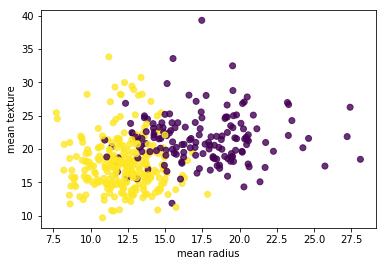

In [3]:
print('Gráfico exibindo as duas primeiras características do sub-conjunto de treino:')
_ = plt.scatter(x_train[:, 0], x_train[:, 1],
                c=y_train,
                alpha=0.8)
_ = plt.xlabel(dataset.feature_names[0])
_ = plt.ylabel(dataset.feature_names[1])

In [4]:
estimators = [SVC(random_state=13), LogisticRegression(random_state=24)]

for e in estimators:
    print('Treinando estimator', type(e).__name__)
    e.fit(x_train, y_train)

print('Todos os estimatores foram treinados!')

Treinando estimator SVC
Treinando estimator LogisticRegression
Todos os estimatores foram treinados!


### Apresente um relatório das principais métricas para ambos estimadores

In [5]:
for estimator in estimators:
    display(Markdown(f'## {type(estimator).__name__}'))
    
    datasets = [
        ('Train', x_train, y_train),
        ('Test', x_test, y_test),
        ('Test 2 (classe 1 duplicada)', np.concatenate([x_test, x_test[y_test==1]]), np.concatenate([y_test, y_test[y_test==1]])),
        ('Test 3 (classe 0 duplicada)', np.concatenate([x_test, x_test[y_test==0]]), np.concatenate([y_test, y_test[y_test==0]])),
    ]
    
    for dataset_name, x, y in datasets:
        display(Markdown(f'### {dataset_name}'))
        
        p = estimator.predict(x)

        kwargs = {
            'classification_report': {'digits': 5}
        }
        for metric in ['precision_score', 'recall_score', 'accuracy_score', 'f1_score', 'classification_report', 'confusion_matrix']:
            ret = getattr(metrics, metric)(y_true = y, y_pred = p, **kwargs.get(metric, {}))
            inline_ret = ''
            after_ret = None
            
            if isinstance(ret, np.ndarray):
                after_ret = pd.DataFrame(ret)
            elif len(str(ret)) > 20 or '\n' in str(ret):
                after_ret = Pretty(str(ret))
            else:
                inline_ret = str(ret)
            
            display(Markdown(f'- __{metric}__: {inline_ret}'))
            if after_ret is not None:
                display(after_ret)


## SVC

### Train

- __precision_score__: 1.0

- __recall_score__: 1.0

- __accuracy_score__: 1.0

- __f1_score__: 1.0

- __classification_report__: 

             precision    recall  f1-score   support

          0    1.00000   1.00000   1.00000       158
          1    1.00000   1.00000   1.00000       268

avg / total    1.00000   1.00000   1.00000       426


- __confusion_matrix__: 

,0,1
0,158,0
1,0,268


### Test

- __precision_score__: 0.6223776223776224

- __recall_score__: 1.0

- __accuracy_score__: 0.6223776223776224

- __f1_score__: 0.7672413793103448

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


- __classification_report__: 

             precision    recall  f1-score   support

          0    0.00000   0.00000   0.00000        54
          1    0.62238   1.00000   0.76724        89

avg / total    0.38735   0.62238   0.47751       143


- __confusion_matrix__: 

,0,1
0,0,54
1,0,89


### Test 2 (classe 1 duplicada)

- __precision_score__: 0.7672413793103449

- __recall_score__: 1.0

- __accuracy_score__: 0.7672413793103449

- __f1_score__: 0.8682926829268294

- __classification_report__: 

             precision    recall  f1-score   support

          0    0.00000   0.00000   0.00000        54
          1    0.76724   1.00000   0.86829       178

avg / total    0.58866   0.76724   0.66619       232


- __confusion_matrix__: 

,0,1
0,0,54
1,0,178


### Test 3 (classe 0 duplicada)

- __precision_score__: 0.4517766497461929

- __recall_score__: 1.0

- __accuracy_score__: 0.4517766497461929

- __f1_score__: 0.6223776223776224

- __classification_report__: 

             precision    recall  f1-score   support

          0    0.00000   0.00000   0.00000       108
          1    0.45178   1.00000   0.62238        89

avg / total    0.20410   0.45178   0.28118       197


- __confusion_matrix__: 

,0,1
0,0,108
1,0,89


## LogisticRegression

### Train

- __precision_score__: 0.9595588235294118

- __recall_score__: 0.9738805970149254

- __accuracy_score__: 0.9577464788732394

- __f1_score__: 0.9666666666666668

- __classification_report__: 

             precision    recall  f1-score   support

          0    0.95455   0.93038   0.94231       158
          1    0.95956   0.97388   0.96667       268

avg / total    0.95770   0.95775   0.95763       426


- __confusion_matrix__: 

,0,1
0,147,11
1,7,261


### Test

- __precision_score__: 0.9560439560439561

- __recall_score__: 0.9775280898876404

- __accuracy_score__: 0.958041958041958

- __f1_score__: 0.9666666666666667

- __classification_report__: 

             precision    recall  f1-score   support

          0    0.96154   0.92593   0.94340        54
          1    0.95604   0.97753   0.96667        89

avg / total    0.95812   0.95804   0.95788       143


- __confusion_matrix__: 

,0,1
0,50,4
1,2,87


### Test 2 (classe 1 duplicada)

- __precision_score__: 0.9775280898876404

- __recall_score__: 0.9775280898876404

- __accuracy_score__: 0.9655172413793104

- __f1_score__: 0.9775280898876404

- __classification_report__: 

             precision    recall  f1-score   support

          0    0.92593   0.92593   0.92593        54
          1    0.97753   0.97753   0.97753       178

avg / total    0.96552   0.96552   0.96552       232


- __confusion_matrix__: 

,0,1
0,50,4
1,4,174


### Test 3 (classe 0 duplicada)

- __precision_score__: 0.9157894736842105

- __recall_score__: 0.9775280898876404

- __accuracy_score__: 0.949238578680203

- __f1_score__: 0.9456521739130435

- __classification_report__: 

             precision    recall  f1-score   support

          0    0.98039   0.92593   0.95238       108
          1    0.91579   0.97753   0.94565        89

avg / total    0.95121   0.94924   0.94934       197


- __confusion_matrix__: 

,0,1
0,100,8
1,2,87


### Qual dos dois estimadores apresenta menor taxa de erro sobre o conjunto WDBC teste?

A regressão logistica possui taxa de erro _muito_ menor


- Algum dos estimatores super-especificou sobre o conjunto de treinamento?
  - Sim, O SVC é _perfeito_ no conjunto de treino, porém inútil no conjunto de teste
- Quantas vezes cada um dos estimadores errou, no conjunto de teste?
  - SVC: 54
  - Regressão logistica: 6.

### Os estimadores conseguem distinguir ambas as classes de forma satisfatória?

Utilize uma ou mais funções vistas em aula para descobrir se os classificadores efetivamente conseguem distinguir amostras benignas de malignas.

- A Regressão Logistica pode distinguir as classes de forma bastante satisfatória: Para ambas as classes a precisão de classificação é maior que 92%

As pontuações mudam quando consideramos a frequência das classes?
- Sim, praticamente todas as métricas são afetadas pela mudança de frequencia entre as classes, conforme comparação do conjunto de testes 1, 2 e 3. A única exceção é o _recall_, que é calculado para cada classe independentemente.

### Qual estimador possui melhor *f-1 score*?

Como já esperávamos pelas demais métricas, a regressão logistica possui um F1 melhor